# Introduction

### FEATURES 
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

<span style='color:MediumVioletRed'><font size="4">Importing the necessary library </span><br></font>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import re
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from wordcloud import WordCloud
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("flight dataset.csv") 

In [3]:
target='price'

In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


## DATA CLEANING

In [6]:
# Dropping the useless column 'Unnamed: 0'
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.isnull().sum()         ##Finding the null values

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

**Dataset has zero null values.**

In [8]:
symbols = ["?","$","#","$","%","&","*","+","@","_","-"]
def remove_spchar(x):
    for column in x.values:
        for symbol in symbols:
            if symbol not in column:
                print("Special Character Not detected")
                return x
            else:
                print("Special Character Detected and will be Removed: ")
                x2 = x.replace(symbol,np.nan)
                return x2
        
df= remove_spchar(df)
df.head()

Special Character Not detected


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
print(f"Dataset has {df.duplicated().sum()} duplicated values.")            ##Finding the duplicate values

Dataset has 0 duplicated values.


### Correlation

In [10]:
df.corr(method='kendall')

C:\Users\Reeshabh Kumar\AppData\Local\Temp\ipykernel_2112\1723791258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='kendall')


,duration,days_left,price
duration,1.000000,-0.022397,0.214285
days_left,-0.022397,1.000000,-0.185616
price,0.214285,-0.185616,1.000000


# NUMERICAL COLS

In [11]:
num_col=numerical_cols=df.select_dtypes(exclude=['object']).columns

df[numerical_cols].head(5)

,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955


# CATEGORICAL COLS

In [12]:
categorical_cols=df.select_dtypes(include=['object']).columns
df[categorical_cols].head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy


In [13]:
#DROPPING FLIGHTS FOR VISUALIZATION
df2=df.drop('flight',axis=1)

### Insights

In [17]:
def plot_categorical_columns(data):
    # Plotting code goes here
    for column in data.columns.sort_values(ascending=False):
        if data[column].dtype == "object":
            sns.countplot(x=column ,data=data.reset_index(),palette='viridis')
            plt.show()

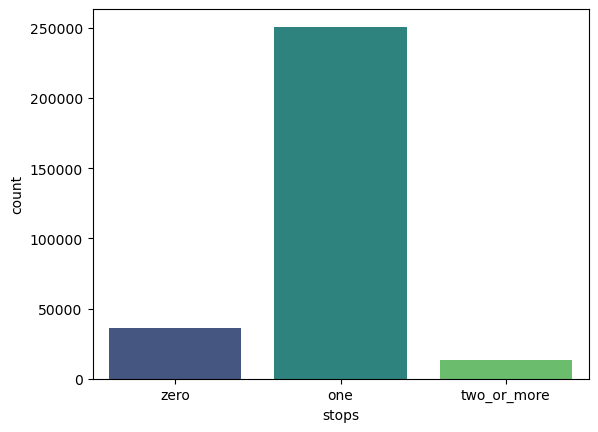

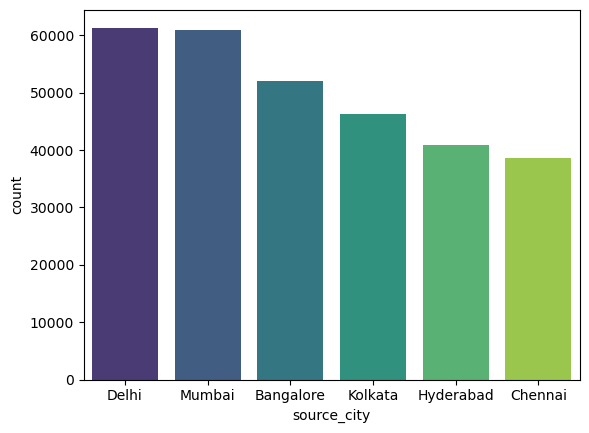

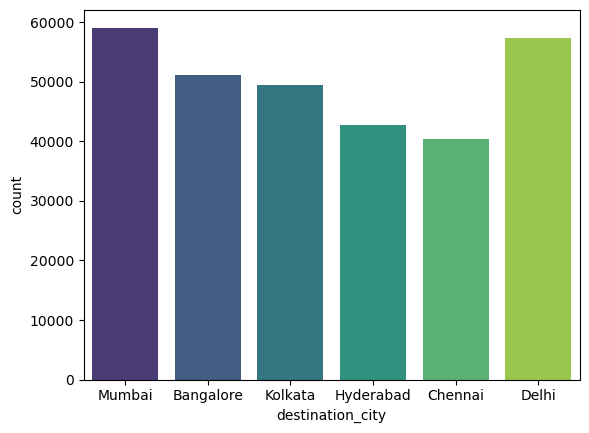

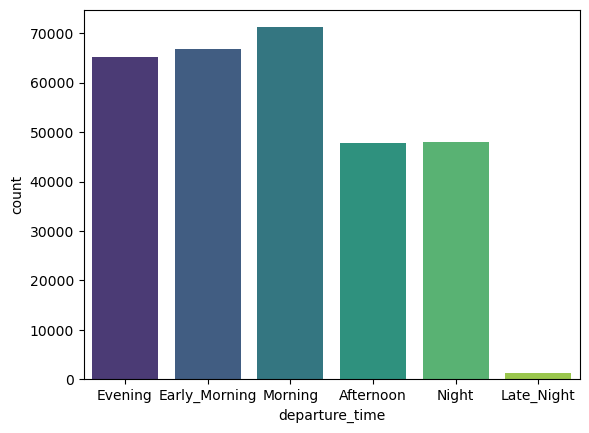

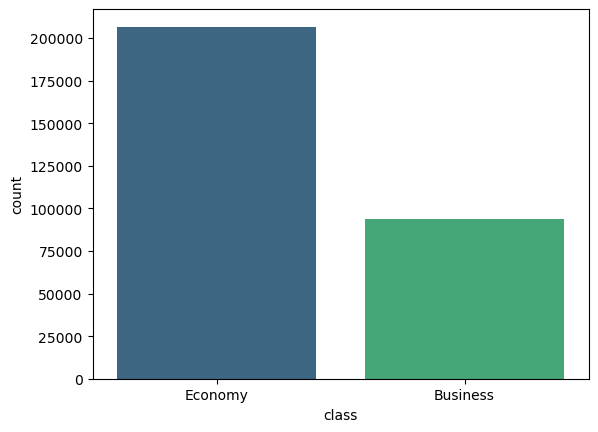

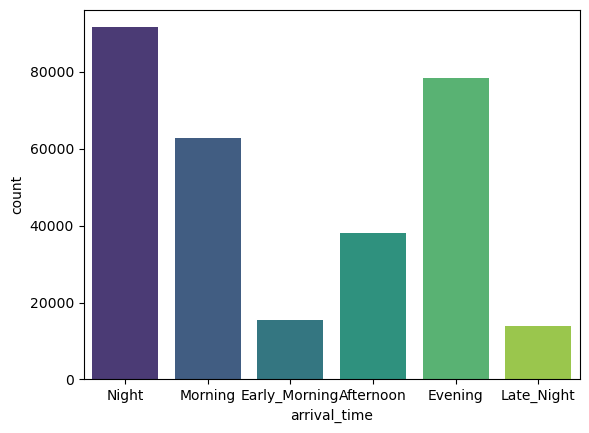

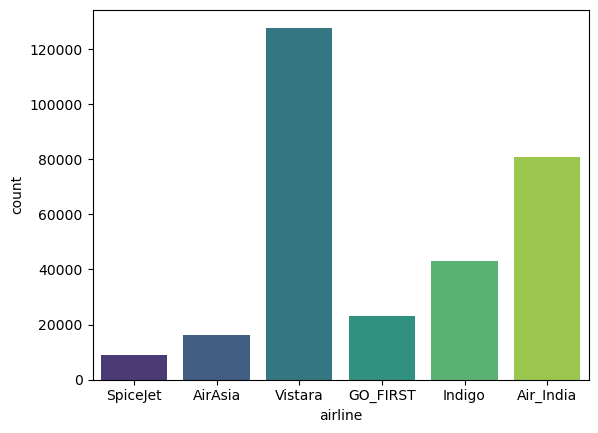

In [18]:
plot_categorical_columns(df2)

In [14]:
air=pd.DataFrame(df['airline'].value_counts())
air.reset_index(inplace=True)

In [15]:
air

,index,airline
0,Vistara,127859
1,Air_India,80892
2,Indigo,43120
3,GO_FIRST,23173
4,AirAsia,16098
5,SpiceJet,9011


In [20]:
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD', '#E1E0E1', '#F4F4F4', '#FFFFFF', '#000000', '#4D4D4D']

blue_grad = ["#0000FF","#4169E1","#87CEEB","#ADD8E6","#B0C4DE", "#1E90FF", "#00BFFF", "#00CED1", "#7EC0EE", "#6495ED"]

pink_grad = ["#FFC0CB" ,"#FF69B4","#FFB6C1","#FFC1CC","#FFA07A", "#FF1493", "#FF8AC2", "#FF6EB4", "#F08080", "#FFD1DC"]

purple_grad = ["#4B0082","#7B1FA2","#9C27B0","#BA68C8","#CE93D8", "#6A5ACD", "#8A2BE2", "#9370DB", "#AB82FF", "#BA55D3"]

green_grad = ["#006400","#228B22","#3CB371","#7FFFD4","#90EE90", "#32CD32", "#ADFF2F", "#00FF7F", "#98FB98", "#66CDAA"]

orange_grad = ["#FF4500","#FF8C00","#FFA500","#FFB347","#FFDAB9", "#FF6347", "#FF7F50", "#FFA07A", "#FFB6C1", "#FF8C69"]

red_grad = ["#8B0000","#B22222","#CD5C5C","#F08080","#FFA07A", "#DC143C", "#FF0000", "#FF6347", "#FF4500", "#FF6B6B"]

yellow_grad = ["#FFD700","#FFFF00","#FFFFE0","#FFFACD","#FAFAD2", "#F0E68C", "#EEE8AA", "#FFEF00", "#FFFF99", "#DAA520"]

In [17]:
counts = air['index'].value_counts()
label = counts.index.tolist()

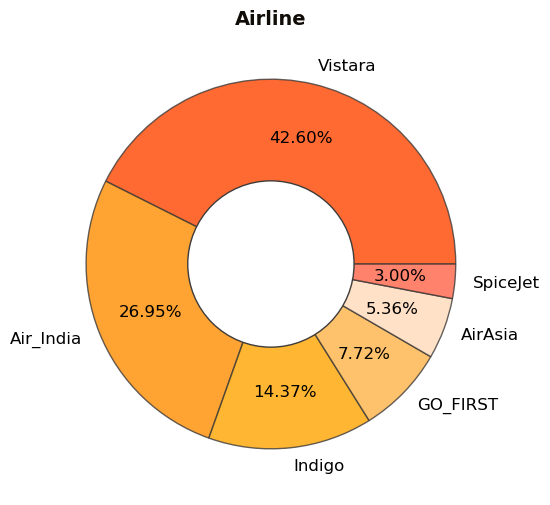

In [24]:
plt.figure(figsize=(6,6))
colors=orange_grad[:len(label)]
plt.title('Airline', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['airline'].value_counts(), 
        labels=label, 
        colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

In [25]:
df['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [32]:
counts = df['class'].value_counts()
label = counts.index.tolist()

In [33]:
label

['Economy', 'Business']

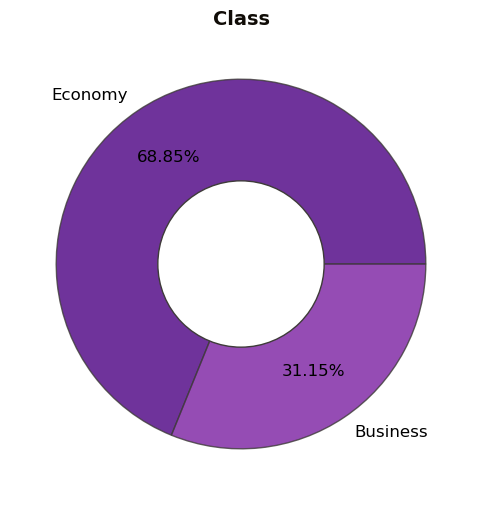

In [36]:
plt.figure(figsize=(6,6))

colors=purple_grad[:len(label)]
plt.title('Class', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['class'].value_counts(), 
        labels=label, 
        colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)


<span style='color:RebeccaPurple'><font size="2"> Most preferred class is Economic Class </span><br></font>

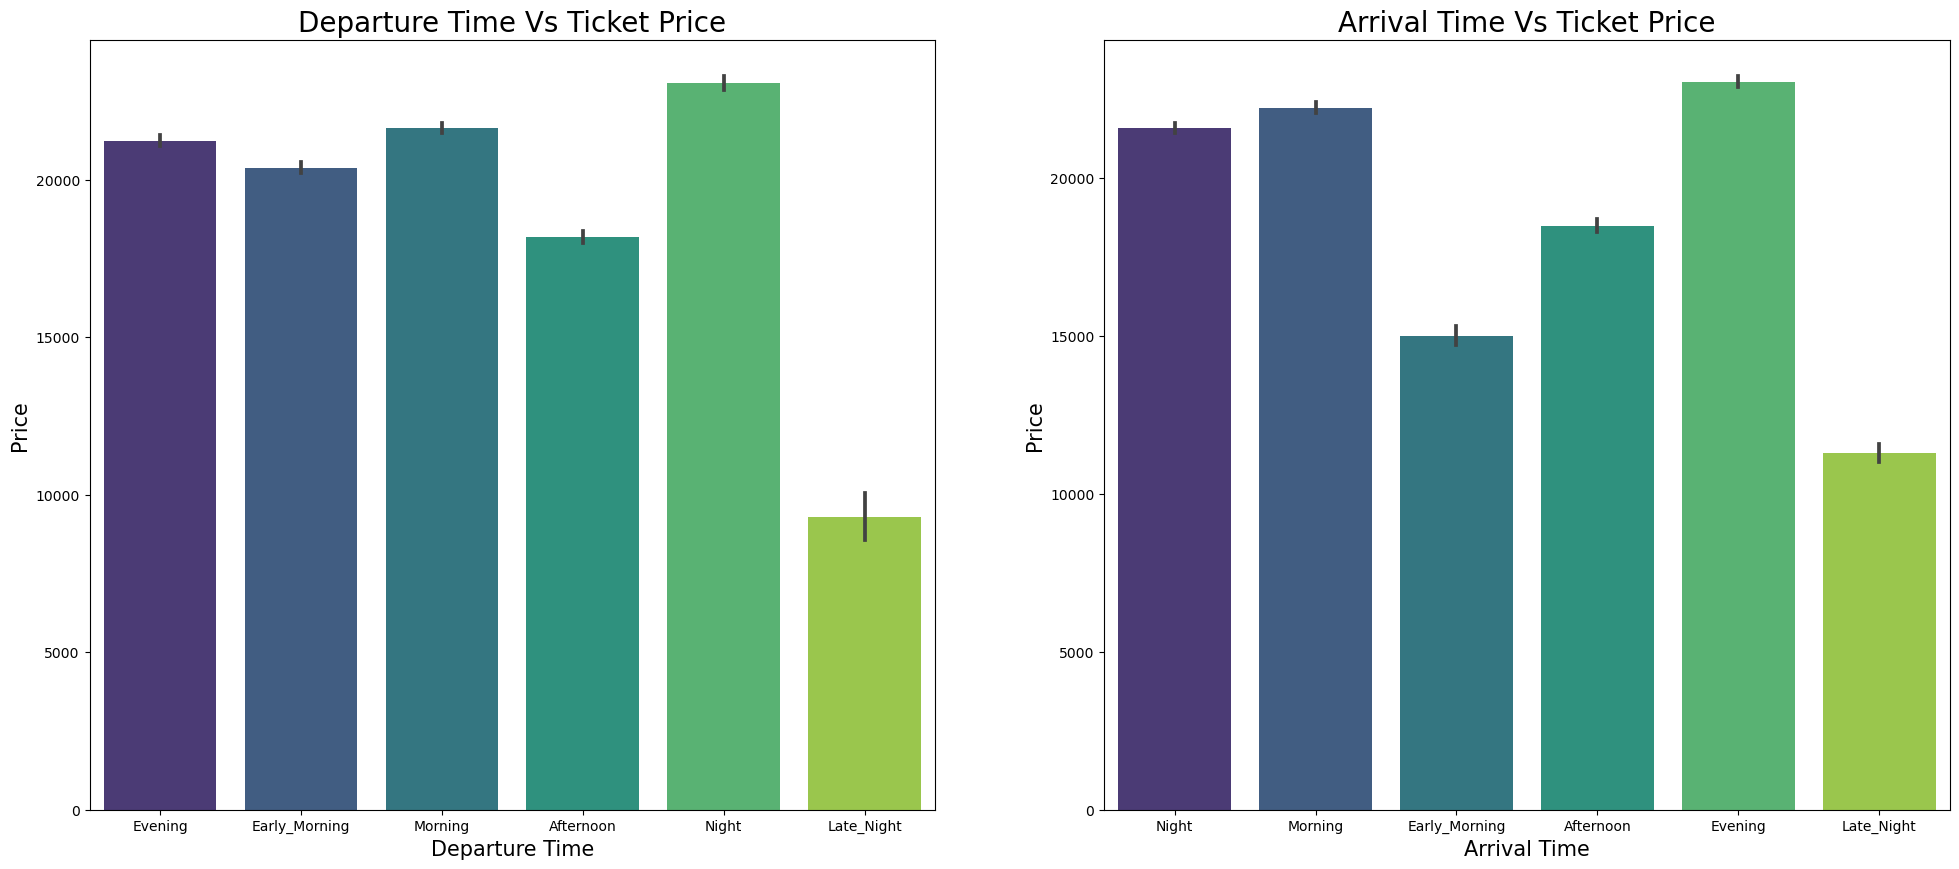

In [27]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.barplot(x='departure_time',y='price',data=df2,palette='viridis')
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.barplot(x='arrival_time',y='price',data=df2,palette='viridis')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

 **Pricing Change On Departure Time and Arrival time**

**Departure Time**

><span style='color:DarkMagenta'> Pricing of Night flights is more</span><br>
><span style='color:DarkMagenta'> Ticketing is almost equal Early_morning, Morning, Evening flights </span><br>
><span style='color:DarkMagenta'> Late nights flights have lowest fares </span><br> 
___
**Arrival Time**

><span style='color:Teal'> Pricing of Evening flights is more</span><br>
><span style='color:Teal'> Ticketing is almost equal Morning, Night flights </span><br>
><span style='color:Teal'> Early_Morning, Late nights flights have lowest fares </span><br> 

## Data Preprocessing

**Creating a backup file**

In [38]:
df_back=df.copy()

In [39]:
## Converting the categorical into numerical categorical by labelencoder
from sklearn.preprocessing import LabelEncoder

df_lab=LabelEncoder() ##Creating Variable for encoding

In [40]:
for col in df.columns:
    if df[col].dtype==categorical_cols:
        df[col]=df_lab.fit_transform(df[col])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [41]:
x=df.drop(target,axis=1)
y=df[target] 

In [42]:
##Splitting the test train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4000)
print('X Train: ',X_train.shape)
print('X Test:  ',X_test.shape)
print('y Train: ',y_train.shape)
print('y Test:  ',y_test.shape)

X Train:  (240122, 10)
X Test:   (60031, 10)
y Train:  (240122,)
y Test:   (60031,)


In [43]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmScalar= MinMaxScaler()
X_train=mmScalar.fit_transform(X_train)
X_test=mmScalar.fit_transform(X_test)
X_train.shape                         

(240122, 10)

### **Building the Regressor / RegressorModels**

In [72]:
##Importing the models
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

## Creating variables for different Models

print('---Ridge Regressor---')
model_ri= Ridge().fit(X_train, y_train)
print('---Lasso Regressor---')
model_La= Lasso(alpha=1.0).fit(X_train, y_train)
print('---Random Forest Regressor---')
model_rf= RandomForestRegressor().fit(X_train, y_train)

---Ridge Regressor---
---Lasso Regressor---
---Random Forest Regressor---


**Predicting Test data**

In [73]:
## Predicting Test data with different Regressor Models
print('---Ridge Regressor---')

price_pred_ri=model_ri.predict(X_test)

print('---Lasso Regressor---')

price_pred_La=model_La.predict(X_test)

print('---Random Tree Regressor---')

price_pred_rf=model_rf.predict(X_test)

---Ridge Regressor---
---Lasso Regressor---
---Random Tree Regressor---


##### **Evaluating the results of models**

<!-- ****
<span style='color:DarkCyan'><font size="4">Metrics</span><br></font>

<span style='color:DarkCyan'><font size="2">R2_Score:</span><br></font>**It is called coefficient of determination.R2 indicates the proportion of data points which lie within the line created by the regression equation.**

<span style='color:DarkCyan'><font size="2">MAE:</span><br></font>**It is used as evaluation metrics for regression models in machine learning. It calculates errors between actual values and values predicted by the model**

<span style='color:DarkCyan'><font size="2">RMAE:</span><br></font>

<span style='color:DarkCyan'><font size="2">MAE:</span><br></font>

<span style='color:DarkCyan'><font size="2">MAE:</span><br></font> -->

In [74]:

print('---Ridge Regressor---')
print("R2 Score: ",round(r2_score(y_test, price_pred_ri),3))
print('\n')

print('---Lasso Regressor---')
print("R2 Score: ",round(r2_score(y_test, price_pred_La),3))
print('\n')


print('---Random Forest Regressor---')
print("R2 Score: ",round(r2_score(y_test, price_pred_rf),3))

---Ridge Regressor---
R2 Score:  0.905


---Lasso Regressor---
R2 Score:  0.905


---Random Forest Regressor---
R2 Score:  0.99


In [75]:
rf_acc=round(r2_score(y_test, price_pred_rf),3)
la_acc=round(r2_score(y_test, price_pred_La),3)
ri_acc=round(r2_score(y_test, price_pred_ri),3)

**From the Above Results, The Top 3 Models by comparing Error R2_Score values are**

>**1. Random Forest Regressor**

**Training the Data with Random Forest Regressor**

In [76]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':price_pred_rf})
result=df_back.merge(out,left_index=True,right_index=True)

In [77]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
247685,Vistara,UK-864,Bangalore,Evening,one,Morning,Delhi,Business,16.00,37,57081,57081,57081.00
242361,Vistara,UK-928,Mumbai,Early_Morning,one,Night,Chennai,Business,16.25,14,57453,57453,57453.00
217713,Air_India,AI-868,Delhi,Evening,one,Night,Kolkata,Business,5.67,29,53209,53209,53209.00
74695,Vistara,UK-944,Mumbai,Afternoon,one,Night,Hyderabad,Economy,8.25,32,3971,3971,4099.06
86687,Indigo,6E-886,Bangalore,Morning,one,Evening,Delhi,Economy,6.75,15,10376,10376,10166.31
29081,Vistara,UK-813,Delhi,Evening,one,Night,Hyderabad,Economy,27.33,4,11310,11310,11313.39
38123,Vistara,UK-801,Delhi,Morning,two_or_more,Night,Chennai,Economy,14.00,20,8719,8719,8778.55
145381,Vistara,UK-706,Kolkata,Morning,one,Night,Hyderabad,Economy,12.67,27,5632,5632,5643.12
15741,Air_India,AI-467,Delhi,Evening,one,Morning,Bangalore,Economy,17.92,29,6177,6177,6176.87
126770,Air_India,AI-676,Kolkata,Morning,one,Night,Delhi,Economy,11.83,45,5467,5467,5604.63


In [78]:
result.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'Price_actual', 'Price_pred'],
      dtype='object')

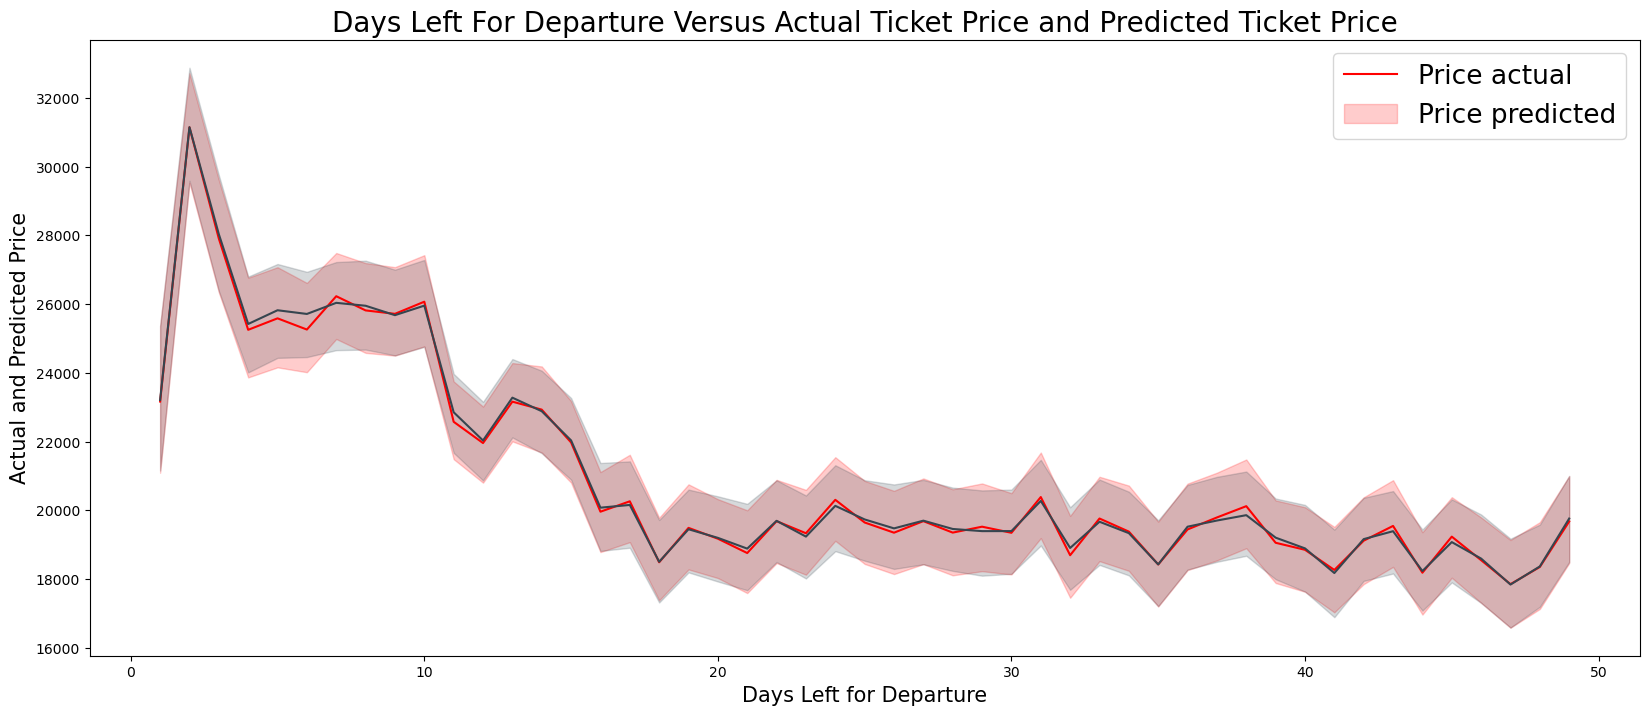

In [79]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x=result.columns[-4],y=result.columns[-2],color='red')
sns.lineplot(data=result,x=result.columns[-4],y=result.columns[-1],color='#36454F')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

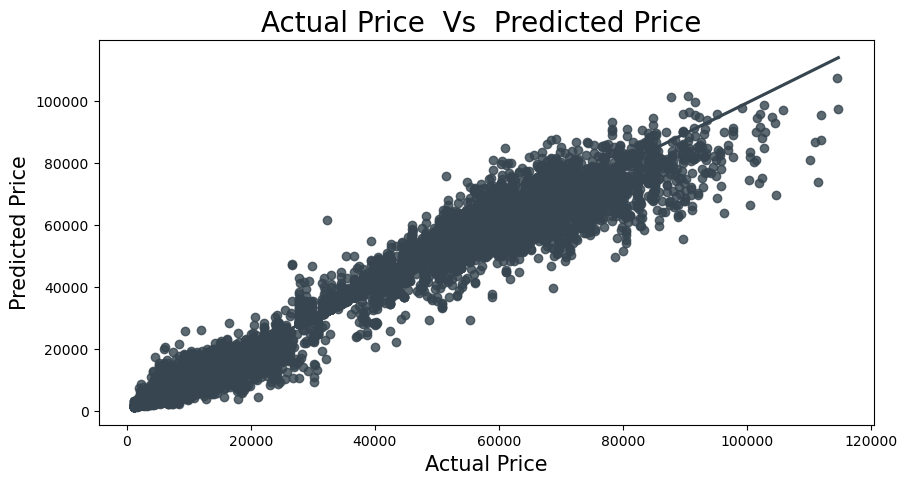

In [80]:
plt.figure(figsize=(10,5))
sns.regplot(x=result.columns[-2],y=result.columns[-1],data=result,color='#36454F')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)

plt.show()

# DEEP Learning

In [82]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor().fit(X_train, y_train)

In [83]:
y_pred = mlp.predict(X_test)

In [84]:
from sklearn.metrics import r2_score
print('Test Score R2: %.3f ' % (r2_score(y_test, y_pred)))

Test Score R2: 0.942 


In [85]:
mlp_acc=round(r2_score(y_test, y_pred),3)

# LSTM

In [44]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(df[target].values.reshape(-1, 1))

In [45]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN

In [46]:
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
optimizer = tf.keras.optimizers.Adam()
early_stopping = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5)]

In [47]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

240122 60031


In [48]:
look_back = 1000
look_back

1000

In [49]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [50]:
x_train, y_train = create_dataset(train, look_back=look_back)
x_test, y_test = create_dataset(test, look_back=look_back)

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(239121, 1000)
(239121,)
(59030, 1000)
(59030,)


In [52]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [53]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(239121, 1, 1000)
(239121,)
(59030, 1, 1000)
(59030,)


In [54]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back), return_sequences=True, kernel_initializer='glorot_uniform'))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss=tf.keras.losses.Huber(), optimizer='adam')
model.fit(x_train, y_train, epochs=50, batch_size=1000, verbose=1)

Epoch 1/50
240/240 [==============================] - 15s 22ms/step - loss: 0.0011
Epoch 2/50
240/240 [==============================] - 4s 17ms/step - loss: 5.5430e-04
Epoch 3/50
240/240 [==============================] - 4s 16ms/step - loss: 4.2473e-04
Epoch 4/50
240/240 [==============================] - 4s 17ms/step - loss: 3.8957e-04
Epoch 5/50
240/240 [==============================] - 4s 17ms/step - loss: 3.5704e-04
Epoch 6/50
240/240 [==============================] - 5s 19ms/step - loss: 3.3600e-04
Epoch 7/50
240/240 [==============================] - 4s 17ms/step - loss: 3.3065e-04
Epoch 8/50
240/240 [==============================] - 4s 18ms/step - loss: 3.1019e-04
Epoch 9/50
240/240 [==============================] - 4s 17ms/step - loss: 3.1159e-04
Epoch 10/50
240/240 [==============================] - 4s 17ms/step - loss: 2.9389e-04
Epoch 11/50
240/240 [==============================] - 5s 19ms/step - loss: 2.8648e-04
Epoch 12/50
240/240 [==============================] - 

In [55]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

1845/1845 [==============================] - 4s 2ms/step


In [56]:
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])


In [57]:
import math
# calculate root mean squared error
trainScore = r2_score(trainY[0], trainPredict[:,0])
print('Train Score R2: %.3f ' % (trainScore))
testScore = r2_score(testY[0], testPredict[:,0])
print('Test Score  R2: %.3f ' % (testScore))

Train Score R2: 0.973 
Test Score  R2: 0.552 


In [58]:
lstm_acc=round(testScore,3)

In [59]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [60]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

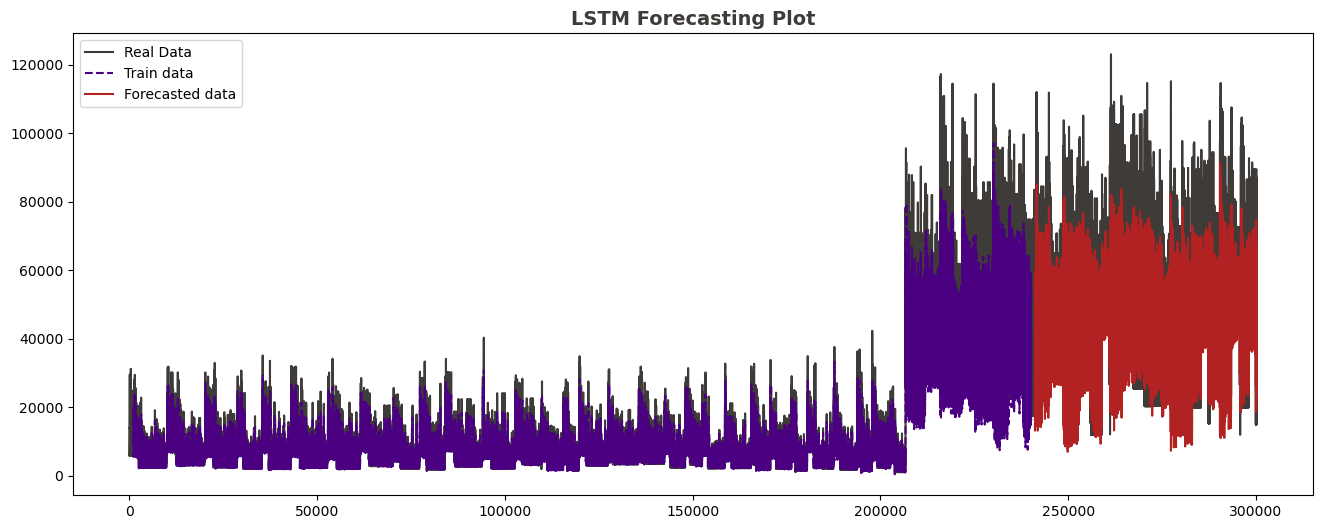

In [63]:
# plt.figure(figsize=(16,6))
# plt.plot(min_max_scaler.inverse_transform(dataset),label='Real Data')
# plt.title("LSTM Forecasting Plot")

# plt.plot(trainPredictPlot, label='Train data')
# plt.plot(testPredictPlot,label='Forcasted data')
# plt.legend()
# plt.show()


plt.figure(figsize=(16,6))
plt.plot(min_max_scaler.inverse_transform(dataset), label='Real Data', color='#3E3B39', linestyle='-')
plt.title("LSTM Forecasting Plot", fontweight='bold', fontsize=14, fontfamily='sans-serif', color='#3E3B39')

plt.plot(trainPredictPlot, label='Train data', color=purple_grad[0], linestyle='--')
plt.plot(testPredictPlot, label='Forecasted data', color=red_grad[1], linestyle='-')
plt.legend()
plt.show()

# ANN

In [64]:
x=df.drop(target,axis=1)
y=df[target] 

In [65]:
##Splitting the test train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4000)
print('X Train: ',X_train.shape)
print('X Test:  ',X_test.shape)
print('y Train: ',y_train.shape)
print('y Test:  ',y_test.shape)

X Train:  (240122, 10)
X Test:   (60031, 10)
y Train:  (240122,)
y Test:   (60031,)


In [66]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
model.add(Dense(units=15, input_dim=len(x.columns.to_list()), kernel_initializer='normal', activation='relu'))
 
model.add(Dense(units=10, kernel_initializer='normal', activation='relu'))
 

model.add(Dense(5, kernel_initializer='normal'))
 
model.compile(loss=tf.keras.losses.Huber(), optimizer='adam',metrics=['mae'])
 
model.fit(X_train, y_train, batch_size=1000, epochs=100, verbose=1)

Epoch 1/100
241/241 [==============================] - 3s 3ms/step - loss: 19343.0566 - mae: 19343.5566
Epoch 2/100
241/241 [==============================] - 1s 2ms/step - loss: 16019.0156 - mae: 16019.5098
Epoch 3/100
241/241 [==============================] - 1s 2ms/step - loss: 15997.9678 - mae: 15998.4707
Epoch 4/100
241/241 [==============================] - 1s 2ms/step - loss: 15987.4023 - mae: 15987.9062
Epoch 5/100
241/241 [==============================] - 1s 2ms/step - loss: 15975.5449 - mae: 15976.0439
Epoch 6/100
241/241 [==============================] - 1s 3ms/step - loss: 15961.9844 - mae: 15962.4854
Epoch 7/100
241/241 [==============================] - 1s 3ms/step - loss: 15946.2119 - mae: 15946.7109
Epoch 8/100
241/241 [==============================] - 1s 3ms/step - loss: 15927.0508 - mae: 15927.5547
Epoch 9/100
241/241 [==============================] - 1s 3ms/step - loss: 15902.5312 - mae: 15903.0303
Epoch 10/100
241/241 [==============================] - 1s 2ms/s

Epoch 80/100
241/241 [==============================] - 1s 2ms/step - loss: 3609.6819 - mae: 3610.1836
Epoch 81/100
241/241 [==============================] - 0s 2ms/step - loss: 3608.7114 - mae: 3609.2122
Epoch 82/100
241/241 [==============================] - 0s 2ms/step - loss: 3608.4243 - mae: 3608.9236
Epoch 83/100
241/241 [==============================] - 0s 2ms/step - loss: 3603.7515 - mae: 3604.2524
Epoch 84/100
241/241 [==============================] - 0s 2ms/step - loss: 3590.7095 - mae: 3591.2095
Epoch 85/100
241/241 [==============================] - 0s 2ms/step - loss: 3586.6672 - mae: 3587.1658
Epoch 86/100
241/241 [==============================] - 0s 2ms/step - loss: 3587.0188 - mae: 3587.5181
Epoch 87/100
241/241 [==============================] - 0s 2ms/step - loss: 3585.5925 - mae: 3586.0950
Epoch 88/100
241/241 [==============================] - 0s 2ms/step - loss: 3575.8796 - mae: 3576.3787
Epoch 89/100
241/241 [==============================] - 0s 2ms/step - los

In [67]:
y_pred = model.predict(X_test)

1876/1876 [==============================] - 3s 2ms/step


In [68]:
y_true=[]
for i in range(0,len(y_pred)):
    y_true.append(y_pred[i][-1])

In [69]:
print('Test Score R2: %.3f ' % (r2_score(y_test, y_true)))

Test Score R2: 0.931 


In [70]:
ann_acc=round(r2_score(y_test, y_true),3)

In [86]:
classification_data = {'Classification Model':  ['RandomForest','Lasso','Ridge','LSTM','MLP','ANN'],
        'Score':     [rf_acc,ri_acc,la_acc,lstm_acc,mlp_acc,ann_acc]}

classification_comparision = pd.DataFrame (classification_data)


In [87]:
classification_comparision.sort_values(by='Score')

,Classification Model,Score
3,LSTM,0.552
1,Lasso,0.905
2,Ridge,0.905
5,ANN,0.931
4,MLP,0.942
0,RandomForest,0.990


In [88]:
fig = px.bar(data_frame=classification_comparision.sort_values(by='Score'), y=classification_comparision.columns[1], 
             x=classification_comparision.columns[0],color_discrete_sequence=[pink_grad[4]])
fig.update_layout(title="Score")

fig.update_traces(dict(marker_line_width=.1))

fig.update_layout(title_x = 0.5)

fig.update_xaxes(tickangle=0)

fig.update_yaxes(tickangle=0)

# fig.update_layout(hovermode='x unified')

fig.update_layout(template="seaborn",font = dict(family = "PT Sans", size = 15, color = "black"))

fig.show()